#### Practical Statistics for Data Scientists (Python)
#### Chapter 1. Exploratory Data Analysis
##### > (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck


In [30]:

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'dataset/data'

In [31]:
# Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'


In [32]:
## Estimates of Location
### Example: Location Estimates of Population and Murder Rates

# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


To compute mean and median in Python we can use the pandas methods of the data frame

In [33]:
print(state['Population'].mean())
print(trim_mean(state['Population'],0.1))
# This is because the trimmed mean excludes the largest and smallest five states (trim=0.1 drops 10% from each end).
print(state['Population'].median())

# The mean is bigger  than the trimmed mean, which is bigger than the median 

6162876.3
4783697.125
4436369.5


In [34]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

#In this case, the weighted mean and the weighted median are about the same

4.445833981123393
4.4


In [35]:
# Standard Deviation
print(state["Population"].std())
# IQR
# A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the interquartile range (or IQR)
print(state["Population"].quantile(0.75) - state["Population"].quantile(0.25))
# Mean absolute deviation
print(robust.scale.mad(state["Population"]))


6848235.347401142
4847308.0
3849876.1459979336


In [36]:
# Quantile

state["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95])


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

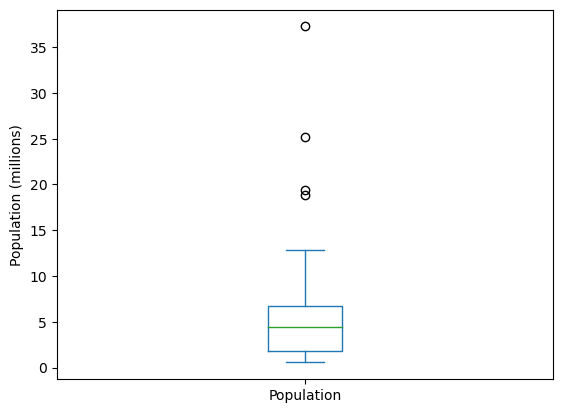

In [37]:
# Boxplots

ax = (state["Population"]/1000000).plot.box()
ax.set_ylabel("Population (millions)")

In [38]:
binnedPopulation = pd.cut(state['Population'],10) #Cortar del mismo tamano los intervalos
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

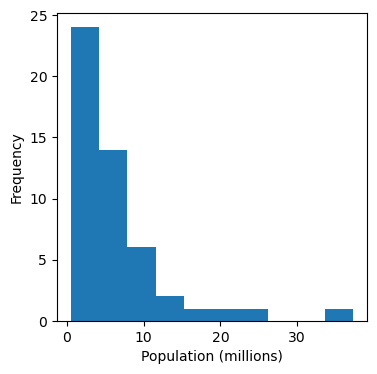

In [39]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

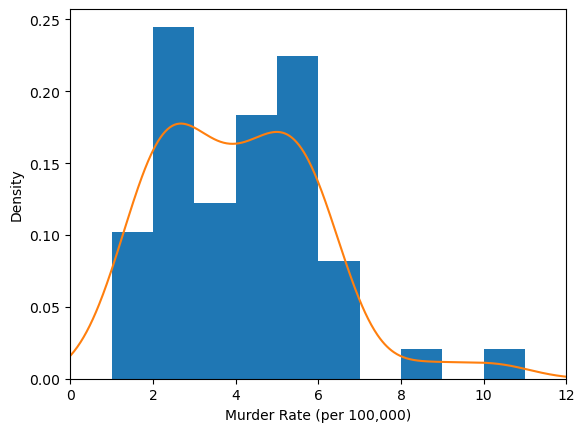

In [40]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')


Text(0, 0.5, 'Count')

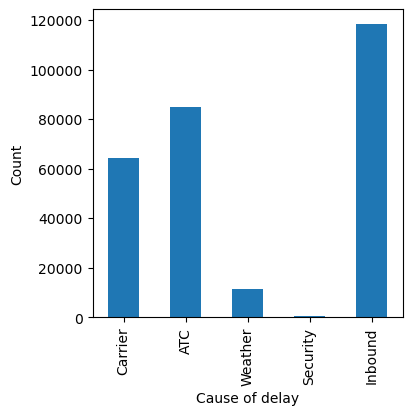

In [42]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')